# SALES ANALYSIS

### Import Necessary Libraries 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from itertools import combinations
from collections import Counter

### Task #1 : Merge the 12-month Sales data into a single CSV file

In [6]:
all_months_data = pd.DataFrame()
files = [file for file in os.listdir("./Sales Data")]

for file in files:
    df = pd.read_csv("./Sales Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)

### Read in updated dataframe

In [7]:
all_data = pd.read_csv("all_data.csv")
all_data.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Drop rows of NaN

In [8]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Find 'Or' and delete it

In [9]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

### Task #2 : Add Month Column

In [10]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task #3 : Add a City Column

In [11]:
# Using apply() method

def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: get_city(x) + "(" + get_state(x) + ")")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston(MA)
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles(CA)


In [12]:
df = all_data
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston(MA)
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles(CA)


## Questions - Code - Answers

### Question #1 : What was the best month for sales? How much was earned that month?

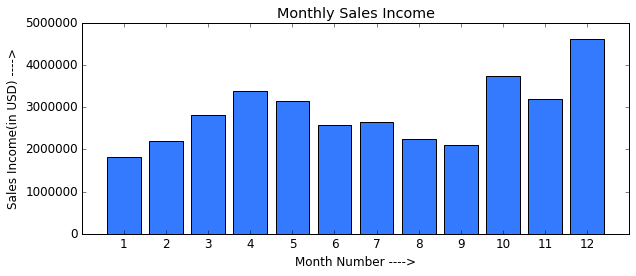


Best Month for Sales: 		 December
Income of the Month(in USD): 	 4613443


In [13]:
# Carrying out the necessary calculations
df["Price Each"] = df["Price Each"].astype("float32")
df["Quantity Ordered"] = df["Quantity Ordered"].astype("int32")

df["Total"] = df["Price Each"] * df["Quantity Ordered"]

prices = []
for i in range(1,13):
    income = df.loc[df["Month"] == i, "Total"]
    month_income = sum(list(income))
    prices.append(month_income)

# print(prices)

months = list(range(1,13))
m = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
     7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}

max_income = max(prices)
max_index = prices.index(max_income)
best_month = m[max_index+1]



# PLotting the Monthly Incomes in a barchart
plt.figure(figsize=(9,4))
# print(list(plt.style.available))
plt.style.use("classic")

plt.bar(months, prices, color="#337AFF")
plt.title("Monthly Sales Income")
plt.xticks(range(1,13))
plt.xlabel("Month Number ---->")
plt.xlim(0,13)
plt.ylabel("Sales Income(in USD) ---->")

plt.tight_layout()
plt.show()



# Printing the Result
print()
print("Best Month for Sales: \t\t", best_month)
print("Income of the Month(in USD): \t", int(max_income))

### Question #2 : Which city sold the most products?

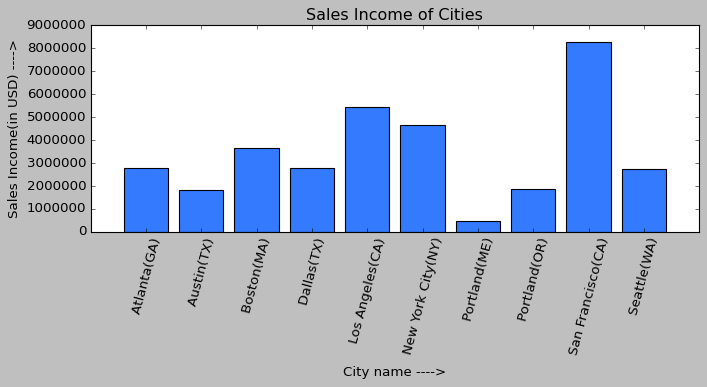


City with Maximum Sales :	 San Francisco(CA)
Income of City (in USD) : 	 8262203.869146585


In [14]:
# Use the groupby() method to aggregate by cities
results = df.groupby("City").sum()
cities = [city for city, x in df.groupby("City")]

city_income = list(results["Total"])
max_city_income = max(city_income)
max_index = city_income.index(max_city_income)
best_city = cities[max_index]



# Plot the total incomes of each city in a barchart 
plt.figure(figsize=(9,5))
# print(list(plt.style.available))
plt.style.use("classic")

plt.bar(cities, results["Total"], color="#337AFF")
plt.title("Sales Income of Cities")
plt.xticks(cities, rotation=75)
plt.xlabel("City name ---->")
plt.xlim(-1,10)
plt.ylabel("Sales Income(in USD) ---->")

plt.tight_layout()
plt.show()


# Printing the Result
print()
print("City with Maximum Sales :\t", best_city, sep="")
print("Income of City (in USD) : \t", max_city_income)

### Question #3 : At what time should we display advertisements to maximize the likelihood of customer's      buying product?

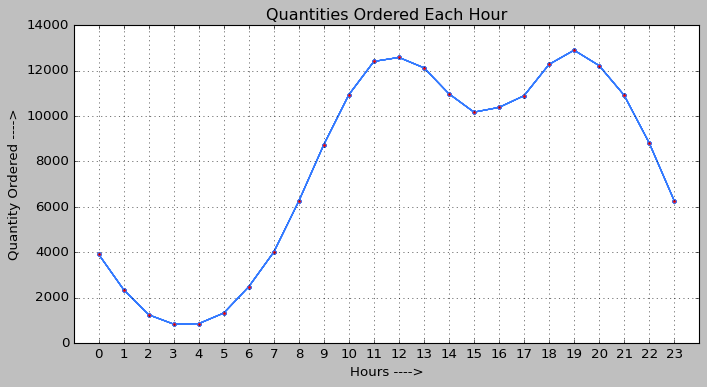

In [15]:
# Use the to_datetime() method to convert the order date from string to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"])
# df.head()

df["Hour"] = df["Order Date"].dt.hour
df["Minute"] = df["Order Date"].dt.minute
# df.head()

hours = [hour for hour, x in df.groupby("Hour")]
hour_sales = df.groupby(["Hour"]).count()


# Plot the result in a line plot 
plt.figure(figsize=(9,5))
# print(list(plt.style.available))
plt.style.use("classic")

plt.plot(hours, hour_sales, color="#337AFF", marker=".", markerfacecolor="red")
plt.grid()
plt.title("Quantities Ordered Each Hour")
plt.xticks(hours)
plt.xlabel("Hours ---->")
plt.ylabel("Quantity Ordered ---->")
plt.xlim(-1,24)

plt.tight_layout()
plt.show()

### Question #4 : Which products are most often sold together?

In [16]:
# Products sold together have same Order-ID. So we need to look for duplicate Order-IDs
dup_df = df[df["Order ID"].duplicated(keep=False)]
# dup_df.head(20)

# Group the Products with same Order-ID together
dup_df["Grouped"] = dup_df.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))
dup_df = dup_df[["Order ID", "Grouped"]].drop_duplicates()
# dup_df.head(20)

# Count the pairs together which have maximum frequency
count = Counter()

for row in dup_df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value, sep=" : ")

print()

('iPhone', ' Lightning Charging Cable') : 1005
('Google Phone', ' USB-C Charging Cable') : 987
('iPhone', ' Wired Headphones') : 447
('Google Phone', ' Wired Headphones') : 414
('Vareebadd Phone', ' USB-C Charging Cable') : 361
('iPhone', ' Apple Airpods Headphones') : 360
('Google Phone', ' Bose SoundSport Headphones') : 220
('Vareebadd Phone', ' Wired Headphones') : 143
(' USB-C Charging Cable', ' Wired Headphones') : 120
('Vareebadd Phone', ' Bose SoundSport Headphones') : 80



<ipython-input-16-b185e06585da>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_df["Grouped"] = dup_df.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))


### Question #5 : Which product sold the most? Why do you think it sold the most?

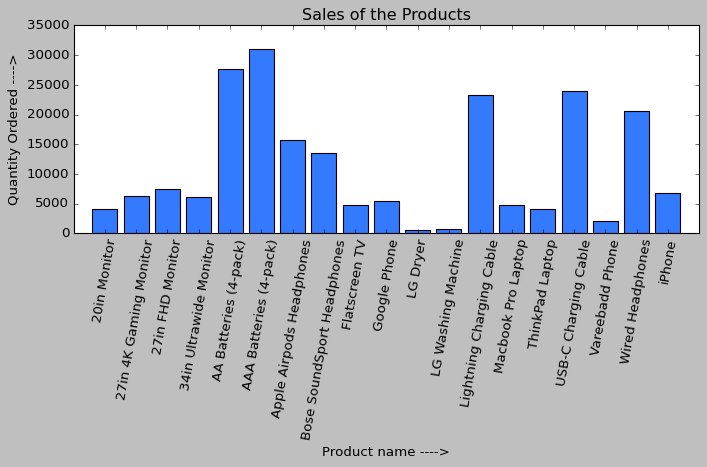

In [17]:
# Aggregate by Product and their quantity ordered
product_grp = df.groupby("Product")
quantity_ordered = product_grp.sum()["Quantity Ordered"]
products = [product for product, x in product_grp]


# Plotting the result in a barchart 
plt.figure(figsize=(9,6))
# print(list(plt.style.available))
plt.style.use("classic")

plt.bar(products, quantity_ordered, color="#337AFF")
plt.title("Sales of the Products")
plt.xticks(products, rotation=80)
plt.xlim(-1,19)
plt.xlabel("Product name ---->")
plt.ylabel("Quantity Ordered ---->")

plt.tight_layout()
plt.show()

### Question #6 : Overlay the Sales of Products with the Price of Products

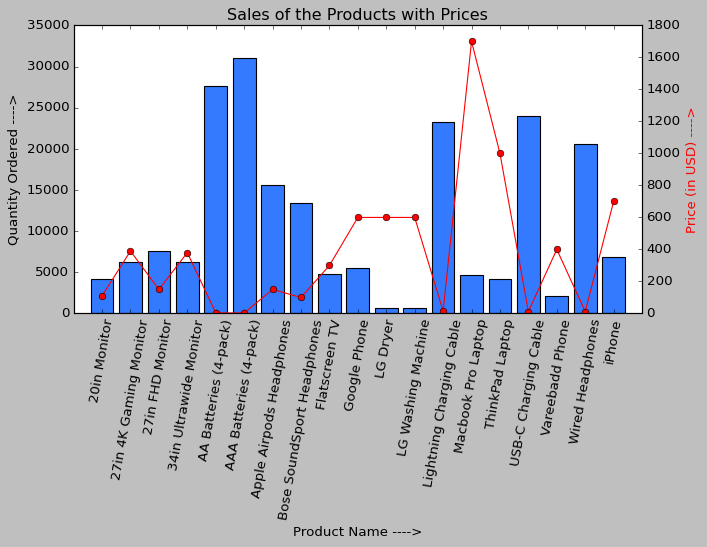

In [18]:
# Aggregate by mean prices of each product
price_each = df.groupby("Product").mean()["Price Each"]


# Plotting the data in a barchart and overlaying it with plot of prices
fig, ax1 = plt.subplots(figsize=(9,7))
ax2 = ax1.twinx()

# print(list(plt.style.available))
plt.style.use("classic")

ax1.bar(products, quantity_ordered, color="#337AFF")
ax2.plot(products, price_each, "r-o")

plt.title("Sales of the Products with Prices")
ax1.set_xlabel("Product Name ---->")
ax1.set_ylabel("Quantity Ordered ---->")
ax1.set_xlim(-1,19)
ax2.set_ylabel("Price (in USD) ---->", color="r")

ax1.set_xticks(products)
ax1.set_xticklabels(products, rotation=80)

plt.tight_layout()
plt.show()